# Purpose 

to explore pycaret==2.0


inspired by: 
- https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e


In [1]:
from pycaret.classification import *
from sklearn import datasets
import pandas as pd
import numpy as np

In [17]:
BINARY = True

In [22]:
if BINARY:
    raw = datasets.load_breast_cancer()
else:
    raw = datasets.load_iris()

    
data = pd.DataFrame(data= np.c_[raw['data'],raw['target']],
                      columns= list(raw['feature_names']) + ['target'])

data["target"] = data["target"].astype("int64")

data.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## load data

In [23]:
clf1 = setup(data=data, target = 'target')


Setup Succesfully Completed!


,Description,Value
0,session_id,8558
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(569, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare models

In [28]:
# see all models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [24]:
# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.9548,0.9907,0.9560,0.9714,0.9632,0.9045,0.9058,0.1149
1,Extreme Gradient Boosting,0.9448,0.9919,0.9520,0.9606,0.9558,0.8822,0.8837,0.0652
2,Decision Tree Classifier,0.9097,0.9033,0.9280,0.9290,0.9274,0.8075,0.8105,0.0090


In [25]:
# return best model based on Recall
top3 = compare_models(sort = 'Recall',n_select=3,blacklist=["svm","nb"]) #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.9522,0.9846,0.9960,0.9354,0.9641,0.8935,0.9001,0.0065
1,Ridge Classifier,0.9573,0.0000,0.9920,0.9447,0.9672,0.9061,0.9105,0.0054
2,Extra Trees Classifier,0.9623,0.9942,0.9800,0.9627,0.9706,0.9179,0.9207,0.1554
3,CatBoost Classifier,0.9573,0.9907,0.9720,0.9622,0.9665,0.9075,0.9098,2.9117
4,Ada Boost Classifier,0.9422,0.9879,0.9640,0.9462,0.9544,0.8753,0.8778,0.1261
5,Light Gradient Boosting Machine,0.9499,0.9909,0.9640,0.9575,0.9601,0.8925,0.8946,0.0763
6,Logistic Regression,0.9371,0.9851,0.9600,0.9427,0.9505,0.8640,0.8674,0.0405
7,K Neighbors Classifier,0.9196,0.9542,0.9560,0.9211,0.9373,0.8251,0.8297,0.0040
8,Random Forest Classifier,0.9548,0.9907,0.9560,0.9714,0.9632,0.9045,0.9058,0.1144
9,Extreme Gradient Boosting,0.9448,0.9919,0.9520,0.9606,0.9558,0.8822,0.8837,0.0511


In [26]:
top3

[LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=8558,
                 solver='auto', tol=0.001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=8558, verbose=0,
                      warm_start=False)]

## Optimize model

In [29]:
model = create_model('et')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9973,0.9600,0.9600,0.9600,0.8933,0.8933
1,0.9250,1.0000,1.0000,0.8929,0.9434,0.8333,0.8452
2,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
3,0.9500,0.9947,0.9600,0.9600,0.9600,0.8933,0.8933
4,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
5,0.9750,1.0000,1.0000,0.9615,0.9804,0.9459,0.9473
6,0.9500,0.9800,0.9600,0.9600,0.9600,0.8933,0.8933
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9231,0.9700,1.0000,0.8929,0.9434,0.8246,0.8376


In [30]:
# somehow drop
tuned_ada = tune_model(model, optimize = 'Accuracy',n_iter = 20) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9920,0.9600,0.9600,0.9600,0.8933,0.8933
1,0.9500,1.0000,1.0000,0.9259,0.9615,0.8904,0.8958
2,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
3,0.9250,0.9947,0.9200,0.9583,0.9388,0.8421,0.8433
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9250,0.9813,0.9600,0.9231,0.9412,0.8378,0.8391
7,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9231,0.9829,1.0000,0.8929,0.9434,0.8246,0.8376


In [31]:
# tune top3 models
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9920,0.9600,0.9600,0.9600,0.8933,0.8933
1,0.9500,1.0000,1.0000,0.9259,0.9615,0.8904,0.8958
2,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
3,0.9250,0.9947,0.9200,0.9583,0.9388,0.8421,0.8433
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9250,0.9813,0.9600,0.9231,0.9412,0.8378,0.8391
7,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9231,0.9829,1.0000,0.8929,0.9434,0.8246,0.8376


# combine models (stack and blend)

In [41]:
#Blend
#blender = blend_models() # use all models

blender_specific = blend_models(estimator_list = [top3[0],top3[2]], method = 'soft')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,0.9973,1.0000,0.8333,0.9091,0.7143,0.7454
1,0.9250,1.0000,1.0000,0.8929,0.9434,0.8333,0.8452
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,1.0000,1.0000,0.9615,0.9804,0.9459,0.9473
6,0.9000,0.9760,0.9600,0.8889,0.9231,0.7808,0.7856
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,1.0000,1.0000,0.9615,0.9804,0.9434,0.9449
9,0.9487,0.9686,1.0000,0.9259,0.9615,0.8850,0.8909


In [44]:
ada_model = create_model('ada')

stacker = stack_models(estimator_list = top3, meta_model = ada_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9787,1.0000,0.9259,0.9615,0.8904,0.8958
1,0.9250,0.9920,1.0000,0.8929,0.9434,0.8333,0.8452
2,0.9750,0.9973,1.0000,0.9615,0.9804,0.9459,0.9473
3,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
4,0.9500,1.0000,0.9200,1.0000,0.9583,0.8961,0.9010
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9627,0.9200,0.9200,0.9200,0.7867,0.7867
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9487,0.9857,1.0000,0.9259,0.9615,0.8850,0.8909


# make predictions on new data

In [48]:

new_data = pd.DataFrame(data = np.random.normal(4,2,[10,30]),
                     columns= raw['feature_names'])

new_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,5.399974,3.274002,2.258949,6.348361,6.114553,4.948353,2.096366,1.741009,5.754863,2.593482,...,4.405503,5.888440,2.867848,2.822690,4.588270,3.809153,4.323334,6.288679,3.806959,4.700466
1,2.656568,2.937502,5.730312,4.060305,5.042849,-0.788709,4.293245,8.918227,3.440091,3.059333,...,3.397918,3.849509,4.255030,6.442559,3.651855,4.599267,5.609787,2.648839,2.112871,3.303675
2,5.603865,2.973580,2.917904,0.908586,2.419464,5.145449,3.187634,7.128815,7.160319,3.804662,...,5.939400,2.818302,2.751078,2.763386,2.685161,6.516561,4.812698,3.654571,2.882990,0.069200


In [50]:
pred_new = predict_model(model, data = new_data)
pred_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,Score
0,5.399974,3.274002,2.258949,6.348361,6.114553,4.948353,2.096366,1.741009,5.754863,2.593482,...,2.867848,2.822690,4.588270,3.809153,4.323334,6.288679,3.806959,4.700466,1,0.60
1,2.656568,2.937502,5.730312,4.060305,5.042849,-0.788709,4.293245,8.918227,3.440091,3.059333,...,4.255030,6.442559,3.651855,4.599267,5.609787,2.648839,2.112871,3.303675,1,0.62
2,5.603865,2.973580,2.917904,0.908586,2.419464,5.145449,3.187634,7.128815,7.160319,3.804662,...,2.751078,2.763386,2.685161,6.516561,4.812698,3.654571,2.882990,0.069200,1,0.60
3,5.652216,7.304003,3.600832,1.501975,6.408600,5.235166,2.151078,3.349062,-1.100622,4.994353,...,3.596823,7.592115,4.627133,7.076592,2.581673,7.392477,1.253019,6.609252,1,0.58
4,5.453621,5.291150,3.445177,4.135895,3.887810,5.880785,3.802879,0.509546,5.754643,4.978621,...,2.860764,6.845635,3.555219,5.262206,2.259046,4.561881,4.672180,2.633505,1,0.57
5,7.418027,6.150105,6.231932,6.123608,3.796991,5.194170,3.503673,2.327910,3.868948,4.760484,...,5.281475,2.764511,7.394103,5.867097,3.939635,3.826362,1.733454,3.246432,1,0.61
6,2.861213,4.300055,4.766631,4.016885,1.074388,3.851828,1.811584,7.034190,6.643159,3.423426,...,1.636977,1.880983,0.471570,3.988022,5.608299,5.579204,0.923811,6.806966,1,0.62
7,0.735419,4.183063,0.303647,2.119887,5.226023,3.385897,5.871485,2.791102,5.346343,3.095033,...,4.158967,5.119356,2.261887,1.725312,7.516454,5.933461,4.961416,5.917894,1,0.63
8,8.206710,3.276848,3.930274,4.401513,5.179493,1.299205,3.651657,1.938966,1.990015,3.057022,...,3.753882,6.419546,6.675924,5.035395,5.526568,5.630970,4.511829,5.608900,1,0.61
9,4.532285,7.911641,4.869718,5.031327,5.981342,1.282040,2.153707,3.006279,3.588221,7.355134,...,4.980540,6.027915,8.496335,5.102162,9.235458,7.437408,5.101951,4.478866,1,0.61


# plot model - charecteristic 

In [ ]:
plot_model(model, plot = 'confusion_matrix')


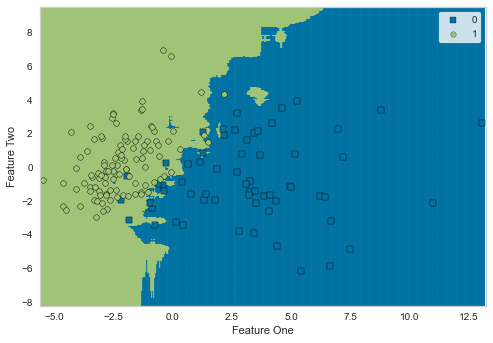

In [63]:
# Decision Boundary
plot_model(model, plot = 'boundary')

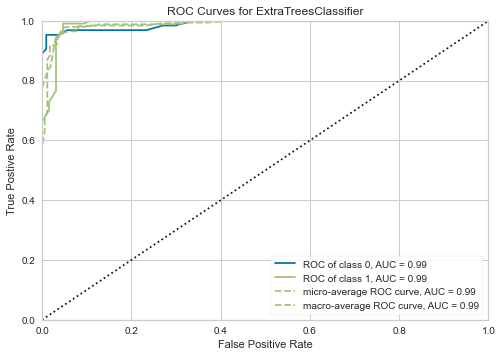

In [64]:
if BINARY:
    plot_model(model, plot = 'auc') # not for multi calss model


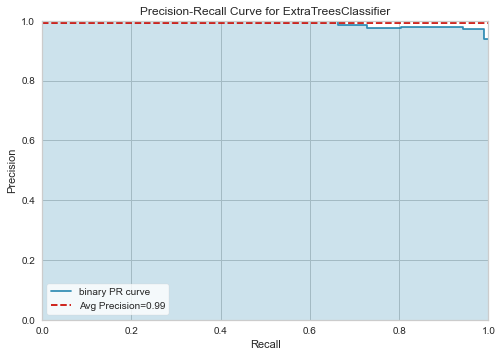

In [66]:
if BINARY:
    # Precision Recall Curve
    plot_model(model, plot = 'pr')



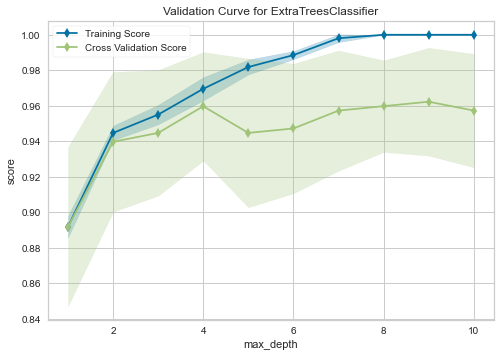

In [65]:
if BINARY:
    # Validation Curve
    plot_model(model, plot = 'vc')

In [67]:
evaluate_model(model) # does not work in jupyter lab?

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


In [ ]:
# init setup
clf1 = setup(data, target = 'target', log_experiment = True, experiment_name = 'exp-name-here')

# compare models
best = compare_models()

# start mlflow server on localhost:5000 (when using notebook)
!mlflow ui

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9749,0.9926,0.9960,0.9658,0.9805,0.9452,0.9469,2.8084
1,Extra Trees Classifier,0.9724,0.9933,0.9920,0.9655,0.9784,0.9403,0.9415,0.1598
2,Light Gradient Boosting Machine,0.9699,0.9886,0.9880,0.9656,0.9765,0.9346,0.9360,0.0848
3,Extreme Gradient Boosting,0.9673,0.9913,0.9800,0.9686,0.9741,0.9297,0.9303,0.0547
4,Gradient Boosting Classifier,0.9623,0.9924,0.9760,0.9654,0.9703,0.9187,0.9201,0.2802
5,Linear Discriminant Analysis,0.9623,0.9847,0.9960,0.9478,0.9710,0.9172,0.9206,0.0082
6,Ridge Classifier,0.9597,0.0000,0.9920,0.9474,0.9689,0.9118,0.9148,0.0073
7,Quadratic Discriminant Analysis,0.9572,0.9902,0.9600,0.9728,0.9659,0.9085,0.9102,0.0077
8,Naive Bayes,0.9523,0.9905,0.9720,0.9543,0.9621,0.8975,0.9009,0.0059
9,Random Forest Classifier,0.9522,0.9827,0.9600,0.9646,0.9619,0.8975,0.8987,0.1140


[2020-08-25 17:58:44 +0200] [4900] [INFO] Starting gunicorn 20.0.4
[2020-08-25 17:58:44 +0200] [4900] [INFO] Listening at: http://127.0.0.1:5000 (4900)
[2020-08-25 17:58:44 +0200] [4900] [INFO] Using worker: sync
[2020-08-25 17:58:44 +0200] [4903] [INFO] Booting worker with pid: 4903
